In [1]:
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,cartopy_xlim, cartopy_ylim)
from wrf import  smooth2d, get_basemap, latlon_coords
import numpy as np
import xarray
import arrow
import netCDF4 as nc
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from mpl_toolkits.basemap import Basemap

# 注意contour 与contourf的区别

C:\Users\lining\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\Users\lining\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  s)


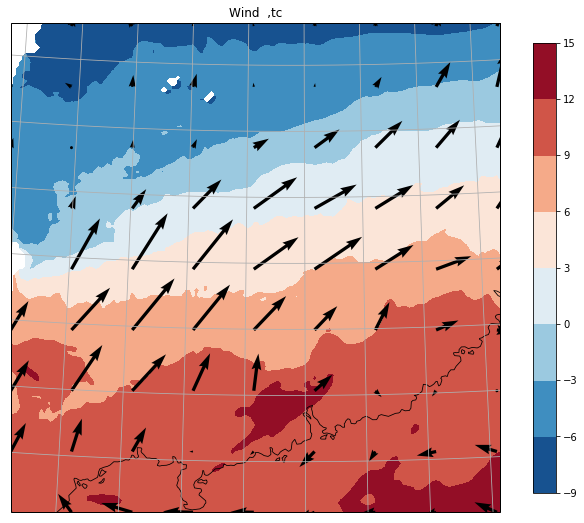

In [26]:
# Open the NetCDF file
#ncfile = Dataset("wrfout_d01_2016-10-07_00_00_00")
flnm = 'C:\\Users\\lining\\Desktop\\myjob\\My_WRF\\wrfout_d02_2018-12-09_16_00_00'
ds = xarray.open_dataset(flnm)
import netCDF4 as nc
import xarray as xr
ncfile=nc.Dataset(flnm)
p = getvar(ncfile, "pressure")
z = getvar(ncfile, "z", units="dm")
ua = getvar(ncfile, "ua", units="kt")
va = getvar(ncfile, "va", units="kt")
tc = getvar(ncfile, "tc")
wspd = getvar(ncfile, "wspd_wdir", units="kts")[0,:]
# Interpolate geopotential height, u, and v winds to 500 hPa
ht_500 = interplevel(z, p, 800)
u_500 = interplevel(ua, p, 800)
v_500 = interplevel(va, p, 800)
wspd_500 = interplevel(wspd, p, 800)
tc_500 = interplevel(tc, p, 800)
# Get the lat/lon coordinates
lats, lons = latlon_coords(ht_500)
# Get the map projection information
cart_proj = get_cartopy(ht_500)
# Create the figure
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection=cart_proj)
# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",facecolor="none",name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=0.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)
# Add the 500 hPa geopotential height contours
levels = np.arange(520., 580., 6.)
contours = plt.contour(to_np(lons), to_np(lats), to_np(ht_500),levels=levels, colors="black",transform=crs.PlateCarree())
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")



cm = ax.contourf(to_np(lons),to_np(lats), to_np(tc_500),
                transform=crs.PlateCarree(),
                cmap='RdBu_r',add_colorbar=True) #'nipy_spectral',



# Add the wind speed contours
#levels = [25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
uv_plot = plt.quiver(to_np(lons[::20,::20]), to_np(lats[::20,::20]), to_np(u_500[::20,::20]),to_np(v_500[::20,::20])
                     ,transform=crs.PlateCarree())
# Add the 500 hPa wind barbs, only plotting every 125th data point.


# Add the 500 hPa wind barbs, only plotting every 125th data point.
'''plt.barbs(to_np(lons[::125,::125]), to_np(lats[::125,::125]),
          to_np(u_500[::125, ::125]), to_np(v_500[::125, ::125]),
          transform=crs.PlateCarree(), length=6)'''

# Set the map bounds
ax.set_xlim(cartopy_xlim(ht_500))
ax.set_ylim(cartopy_ylim(ht_500))
ax.gridlines()
plt.colorbar(cm, orientation="vertical",cmap='RdBu_r',shrink=.92)
plt.title("Wind  ,tc")
plt.show()

In [45]:
p.sel(bottom_top = 1)

<xarray.DataArray 'pressure' (south_north: 162, west_east: 162)>
array([[ 937.34625,  947.194  ,  958.54425, ..., 1013.90326, 1013.77484,
        1013.73035],
       [ 936.9887 ,  946.8863 ,  958.5021 , ..., 1013.9734 , 1013.86975,
        1013.88745],
       [ 941.0561 ,  950.01886,  960.2716 , ..., 1014.0606 , 1013.94684,
        1013.89154],
       ...,
       [ 661.6094 ,  677.1806 ,  695.35187, ..., 1029.847  , 1029.8298 ,
        1029.7614 ],
       [ 667.22766,  683.20087,  700.6653 , ..., 1029.8674 , 1029.9783 ,
        1029.8368 ],
       [ 671.3993 ,  686.6047 ,  700.3706 , ..., 1029.9214 , 1030.0336 ,
        1029.9344 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 104.906006 ... 119.77286
    XLAT     (south_north, west_east) float32 19.979187 19.984566 ... 33.392544
    XTIME    float32 240.00002
    Time     datetime64[ns] 2018-12-09T16:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    Memor

C:\Users\lining\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  s)


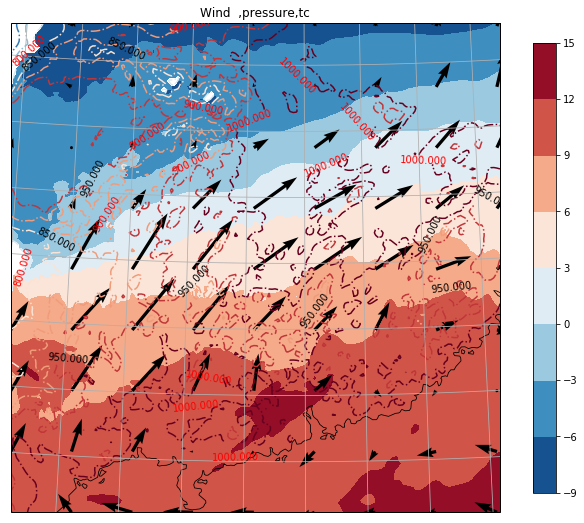

In [47]:
# Open the NetCDF file
#ncfile = Dataset("wrfout_d01_2016-10-07_00_00_00")
flnm = 'C:\\Users\\lining\\Desktop\\myjob\\My_WRF\\wrfout_d02_2018-12-09_16_00_00'
ds = xarray.open_dataset(flnm)
import netCDF4 as nc
import xarray as xr
ncfile=nc.Dataset(flnm)
p = getvar(ncfile, "pressure")
z = getvar(ncfile, "z", units="dm")
ua = getvar(ncfile, "ua", units="kt")
va = getvar(ncfile, "va", units="kt")
tc = getvar(ncfile, "tc")
wspd = getvar(ncfile, "wspd_wdir", units="kts")[0,:]
# Interpolate geopotential height, u, and v winds to 500 hPa
ht_500 = interplevel(z, p, 800)
u_500 = interplevel(ua, p, 800)
v_500 = interplevel(va, p, 800)
wspd_500 = interplevel(wspd, p, 800)
tc_500 = interplevel(tc, p, 800)
# Get the lat/lon coordinates
lats, lons = latlon_coords(ht_500)
# Get the map projection information
cart_proj = get_cartopy(ht_500)
# Create the figure
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection=cart_proj)
# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",facecolor="none",name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=0.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

cm = ax.contourf(to_np(lons),to_np(lats), to_np(tc_500),
                transform=crs.PlateCarree(),
               cmap='RdBu_r',add_colorbar=True) #'nipy_spectral',


cr = ax.contour(to_np(lons),to_np(lats), to_np(p.sel(bottom_top = 1)),
                transform=crs.PlateCarree(),linestyles= 'dashdot' ,
                cmap='RdBu_r') #'nipy_spectral',
plt.clabel(cr,fontsize=10,colors=('k','r'))

#contour = plt.contour(to_np(lons),to_np(lats),to_np(tc_500),colors='k')
#


# Add the wind speed contours
#levels = [25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
uv_plot = plt.quiver(to_np(lons[::20,::20]), to_np(lats[::20,::20]), to_np(u_500[::20,::20]),to_np(v_500[::20,::20])
                     ,transform=crs.PlateCarree())
# Add the 500 hPa wind barbs, only plotting every 125th data point.


# Add the 500 hPa wind barbs, only plotting every 125th data point.
'''plt.barbs(to_np(lons[::125,::125]), to_np(lats[::125,::125]),
          to_np(u_500[::125, ::125]), to_np(v_500[::125, ::125]),
          transform=crs.PlateCarree(), length=6)'''

# Set the map bounds
ax.set_xlim(cartopy_xlim(ht_500))
ax.set_ylim(cartopy_ylim(ht_500))
ax.gridlines()
plt.colorbar(cm, orientation="vertical",cmap='RdBu_r',shrink=.92)
plt.title("Wind  ,pressure,tc")
plt.show()

In [34]:
help(ax.contourf)

Help on method contourf in module cartopy.mpl.geoaxes:

contourf(*args, **kwargs) method of cartopy.mpl.geoaxes.GeoAxesSubplot instance
    Add the "transform" keyword to :func:`~matplotlib.pyplot.contourf'.
    
    Other Parameters
    ----------------
    transform
        A :class:`~cartopy.crs.Projection`.



In [36]:
import matplotlib
help(matplotlib.pyplot.contourf)

Help on function contourf in module matplotlib.pyplot:

contourf(*args, **kwargs)
    Plot contours.
    
    :func:`~matplotlib.pyplot.contour` and
    :func:`~matplotlib.pyplot.contourf` draw contour lines and
    filled contours, respectively.  Except as noted, function
    signatures and return values are the same for both versions.
    
    :func:`~matplotlib.pyplot.contourf` differs from the MATLAB
    version in that it does not draw the polygon edges.
    To draw edges, add line contours with
    calls to :func:`~matplotlib.pyplot.contour`.
    
    
    Call signatures::
    
      contour(Z)
    
    make a contour plot of an array *Z*. The level values are chosen
    automatically.
    
    ::
    
      contour(X,Y,Z)
    
    *X*, *Y* specify the (x, y) coordinates of the surface
    
    ::
    
      contour(Z,N)
      contour(X,Y,Z,N)
    
    contour up to *N+1* automatically chosen contour levels
    (*N* intervals).
    
    ::
    
      contour(Z,V)
      contour(X

In [14]:
help(ax.bar)

Help on method bar in module matplotlib.axes._axes:

bar(*args, data=None, **kwargs) method of cartopy.mpl.geoaxes.GeoAxesSubplot instance
    Make a bar plot.
    
    Call signatures::
    
       bar(x, height, *, align='center', **kwargs)
       bar(x, height, width, *, align='center', **kwargs)
       bar(x, height, width, bottom, *, align='center', **kwargs)
    
    The bars are positioned at *x* with the given *align* ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
   

In [20]:
help(plt.colorbar)

Help on function colorbar in module matplotlib.pyplot:

colorbar(mappable=None, cax=None, ax=None, **kw)
    Add a colorbar to a plot.
    
    Function signatures for the :mod:`~matplotlib.pyplot` interface; all
    but the first are also method signatures for the
    :meth:`~matplotlib.figure.Figure.colorbar` method::
    
      colorbar(**kwargs)
      colorbar(mappable, **kwargs)
      colorbar(mappable, cax=cax, **kwargs)
      colorbar(mappable, ax=ax, **kwargs)
    
    Parameters
    ----------
    mappable :
        The :class:`~matplotlib.image.Image`,
        :class:`~matplotlib.contour.ContourSet`, etc. to
        which the colorbar applies; this argument is mandatory for the Figure
        :meth:`~matplotlib.figure.Figure.colorbar` method but optional for the
        pyplot :func:`~matplotlib.pyplot.colorbar` function, which sets the
        default to the current image.
    
    cax : :class:`~matplotlib.axes.Axes` object, optional
        Axis into which the colorbar wil